In [29]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['id', 'diagnosis'] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

In [30]:
from sklearn.model_selection import train_test_split

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
from sklearn.metrics import accuracy_score, recall_score

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

Accuracy: 0.96
Recall: 0.93


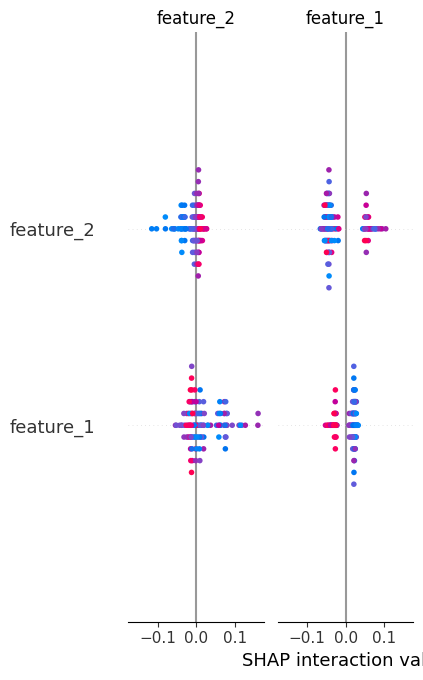

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(
    shap_values, 
    X_test, 
    feature_names=X.columns,
    class_names=['Benign', 'Malignant']
)